In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', 500)

In [57]:
df = pd.read_csv('train.csv',index_col=False)

In [58]:
df.shape

(1460, 81)

In [59]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [60]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [61]:
#pd.isnull(df).any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

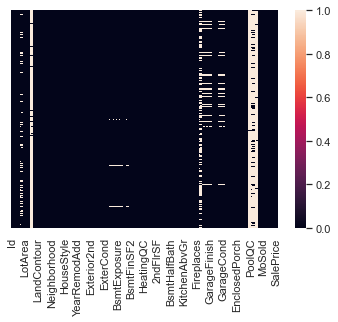

In [62]:
sns.heatmap(df.isnull(), yticklabels=False)

In [63]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [64]:
df.drop(['Alley'],axis=1,inplace=True)

<AxesSubplot:>

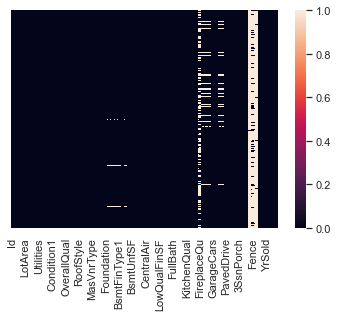

In [65]:
sns.heatmap(df.isnull(), yticklabels=False)

In [66]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

<AxesSubplot:>

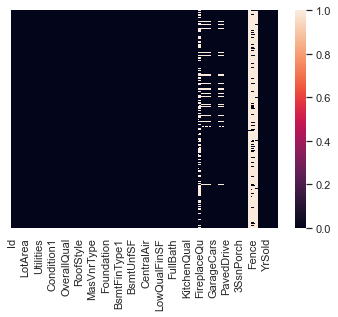

In [67]:
sns.heatmap(df.isnull(), yticklabels=False)

In [68]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [69]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [70]:
df.drop(['FireplaceQu'],axis=1,inplace=True)

In [71]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [72]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [73]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [74]:
df.drop(['PoolQC'],axis=1,inplace=True)
df.drop(['Fence'],axis=1,inplace=True)
df.drop(['MiscFeature'],axis=1,inplace=True)

In [75]:
df.drop(['Id'],axis=1,inplace=True)

<AxesSubplot:>

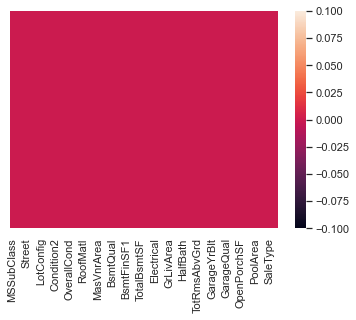

In [76]:
sns.heatmap(df.isnull(), yticklabels=False)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [78]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


<AxesSubplot:>

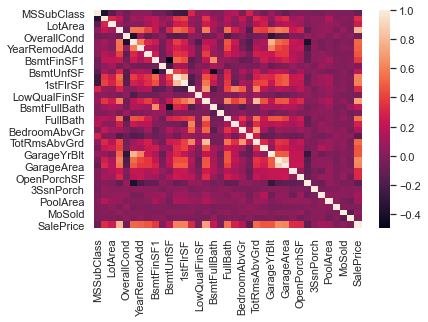

In [79]:
sns.heatmap(df.corr())

In [80]:
df.shape

(1460, 75)

In [82]:
df.to_csv('train_data.csv',index=False)

In [26]:
col = list(df.select_dtypes(['object']).columns)
col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [27]:
len(col)

38

In [28]:
 main_df=df.copy()

In [29]:
df.shape

(1460, 75)

In [30]:
test_df=pd.read_csv('formulatedtest.csv')

In [31]:
test_df.shape

(1459, 74)

In [32]:
final_df=pd.concat([df,test_df],axis=0)

In [33]:
final_df.shape

(2919, 75)

In [34]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [35]:
final_df=category_onehot_multcols(col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [36]:
final_df.shape

(2919, 233)

In [37]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [38]:
final_df.shape

(2919, 177)

In [39]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [40]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
df_Train.shape

(1460, 177)

In [42]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
df_Test.shape

(1459, 176)

<AxesSubplot:>

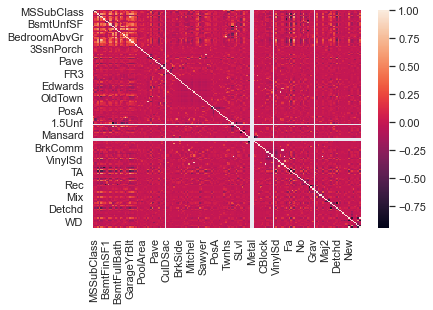

In [44]:
sns.heatmap(df_Test.corr())

In [49]:
df_Test.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
MSSubClass,1.000000,-0.425684,-0.359537,0.034690,-0.071768,0.040848,0.046319,-0.011034,-0.058760,-0.079072,...,-0.024391,-0.014919,-0.036218,-0.021323,0.051563,0.007814,0.044657,-0.044474,0.030260,-0.039430
LotFrontage,-0.425684,1.000000,0.538034,0.172764,-0.084763,0.116294,0.086900,0.225024,0.190722,0.041020,...,-0.010409,-0.027783,0.100906,0.014195,-0.076972,-0.054930,0.034933,0.016190,-0.092535,0.098202
LotArea,-0.359537,0.538034,1.000000,0.107989,-0.103402,0.048314,0.036907,0.187449,0.185431,0.054187,...,-0.026962,-0.020857,0.059571,-0.001203,-0.039412,-0.034914,0.059127,0.075032,-0.084070,0.060139
OverallQual,0.034690,0.172764,0.107989,1.000000,-0.095874,0.621910,0.591267,0.445778,0.322351,-0.028179,...,-0.002877,-0.076231,0.349259,-0.048508,-0.166823,-0.055771,-0.036699,-0.021820,-0.125526,0.343104
OverallCond,-0.071768,-0.084763,-0.103402,-0.095874,1.000000,-0.361027,0.021668,-0.140927,-0.054688,0.043084,...,-0.002534,-0.008989,-0.140072,0.009240,0.162456,-0.061944,-0.018033,-0.039082,0.175424,-0.135465
YearBuilt,0.040848,0.116294,0.048314,0.621910,-0.361027,1.000000,0.631696,0.303491,0.309521,-0.008172,...,-0.042039,-0.073250,0.340851,-0.036430,-0.171436,-0.102307,-0.040041,-0.036546,-0.117373,0.335045
YearRemodAdd,0.046319,0.086900,0.036907,0.591267,0.021668,0.631696,1.000000,0.206497,0.175066,-0.056271,...,-0.047566,-0.072339,0.325619,-0.040119,-0.130802,-0.105150,-0.047047,-0.050581,-0.085182,0.323774
MasVnrArea,-0.011034,0.225024,0.187449,0.445778,-0.140927,0.303491,0.206497,1.000000,0.342471,0.038527,...,-0.008497,-0.025570,0.129322,-0.018868,-0.054559,-0.023206,-0.025823,-0.024229,-0.048338,0.127091
BsmtFinSF1,-0.058760,0.190722,0.185431,0.322351,-0.054688,0.309521,0.175066,0.342471,1.000000,-0.059522,...,-0.001493,-0.023799,0.043462,0.008274,0.005105,-0.037979,0.030851,-0.049982,-0.015738,0.045071
BsmtFinSF2,-0.079072,0.041020,0.054187,-0.028179,0.043084,-0.008172,-0.056271,0.038527,-0.059522,1.000000,...,-0.015620,0.024854,-0.087961,-0.015620,0.078235,-0.022120,-0.027129,0.002226,0.094178,-0.089181


In [45]:
mask = np.zeros_like(df_Test.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [51]:
# plt.figure(figsize=(120,120))
# sns.heatmap(df_Test.corr(), mask=mask, annot=True, annot_kws={"size": 14})
# sns.set_style('white')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()

In [47]:
cols = df_Train.columns

# Train

In [48]:
X=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid,n_estimators=10):
    model = RandomForestRegressor(n_estimators, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [52]:
print(score_dataset(train_X, val_X, train_y, val_y))

19362.224383561646


In [53]:
print(score_dataset(train_X, val_X, train_y, val_y,100))

17448.83506849315


In [54]:
print(score_dataset(train_X, val_X, train_y, val_y,1000))

17024.944378082193


In [55]:
model = RandomForestRegressor(1000, random_state=0)
model.fit(X, y)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [56]:
preds = model.predict(df_Test)

In [57]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(preds)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission_1.csv',index=False)

In [95]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = XGBRegressor(n_estimators=2500, learning_rate=0.03, n_jobs=8)
    model.fit(X_train, y_train,early_stopping_rounds=5, eval_set=[(X_valid, y_valid)],verbose=False)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [73]:
print(score_dataset(train_X, val_X, train_y, val_y)) #1000, 0.05

16454.357405821916


In [84]:
print(score_dataset(train_X, val_X, train_y, val_y))#2000, 0.03

16365.558283390412


In [96]:
print(score_dataset(train_X, val_X, train_y, val_y))

16365.558283390412


In [98]:
model = XGBRegressor(n_estimators=2500, learning_rate=0.03, n_jobs=8)
model.fit(X,y,early_stopping_rounds=5, eval_set=[(X,y)],verbose=False)
preds = model.predict(df_Test)

In [99]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(preds)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission_2.csv',index=False)

# data visualization

<Figure size 720x432 with 0 Axes>

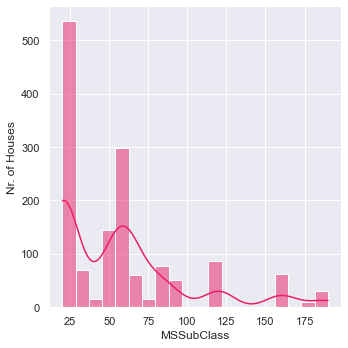

<Figure size 720x432 with 0 Axes>

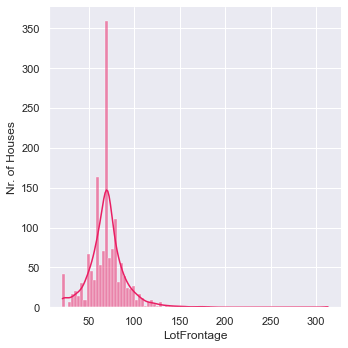

<Figure size 720x432 with 0 Axes>

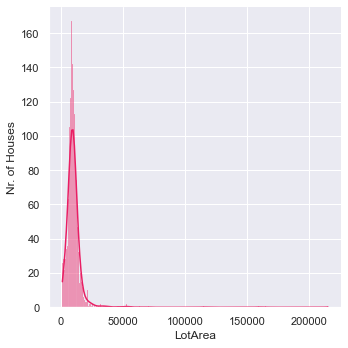

<Figure size 720x432 with 0 Axes>

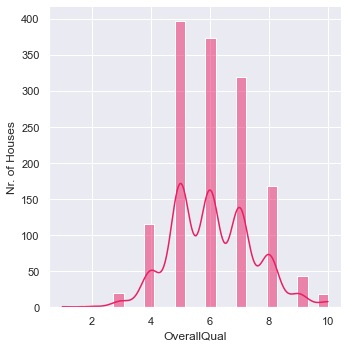

<Figure size 720x432 with 0 Axes>

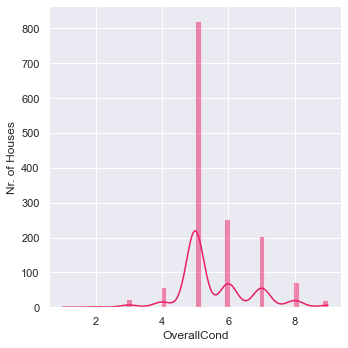

<Figure size 720x432 with 0 Axes>

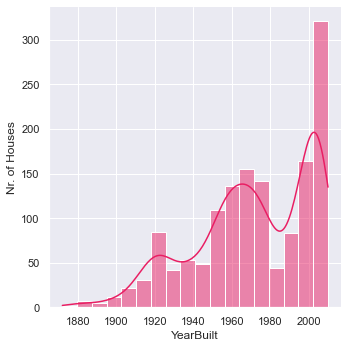

<Figure size 720x432 with 0 Axes>

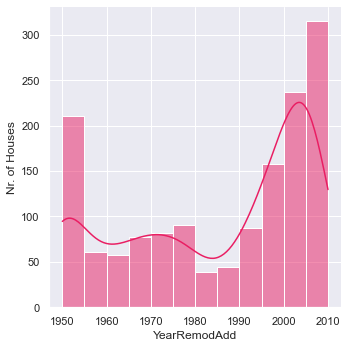

<Figure size 720x432 with 0 Axes>

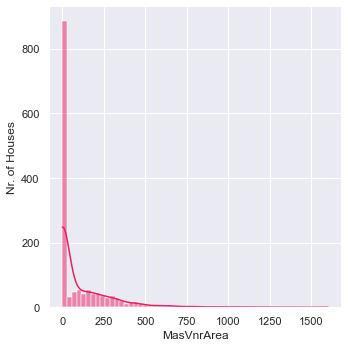

<Figure size 720x432 with 0 Axes>

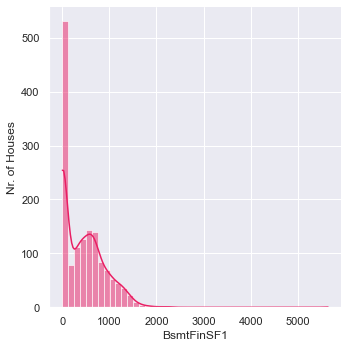

<Figure size 720x432 with 0 Axes>

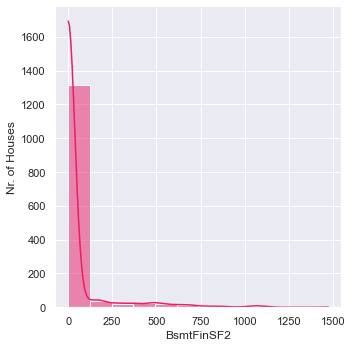

<Figure size 720x432 with 0 Axes>

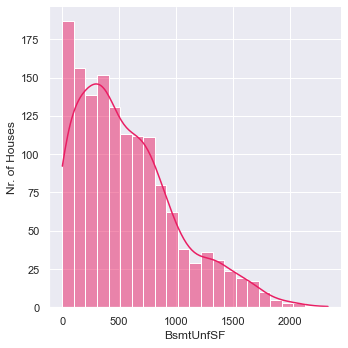

<Figure size 720x432 with 0 Axes>

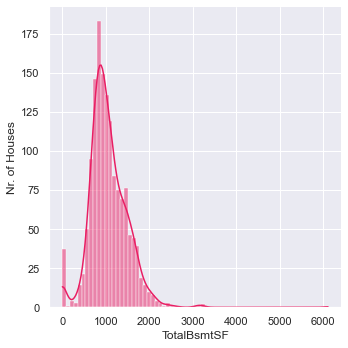

<Figure size 720x432 with 0 Axes>

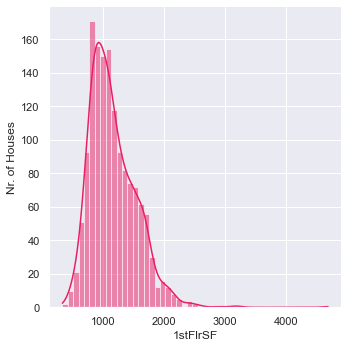

<Figure size 720x432 with 0 Axes>

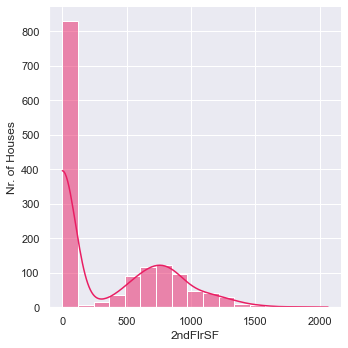

<Figure size 720x432 with 0 Axes>

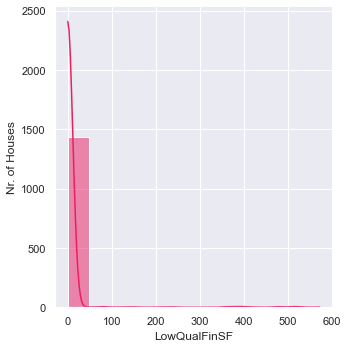

<Figure size 720x432 with 0 Axes>

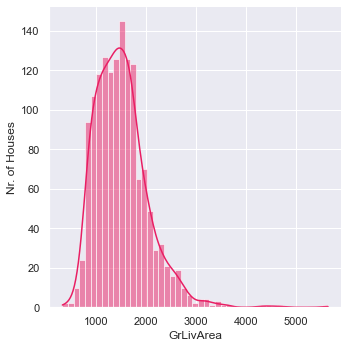

<Figure size 720x432 with 0 Axes>

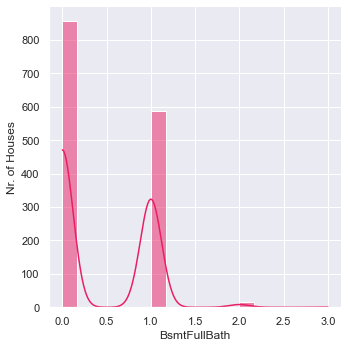

<Figure size 720x432 with 0 Axes>

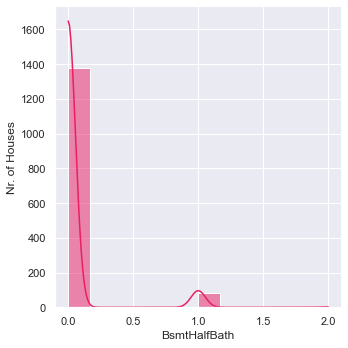

<Figure size 720x432 with 0 Axes>

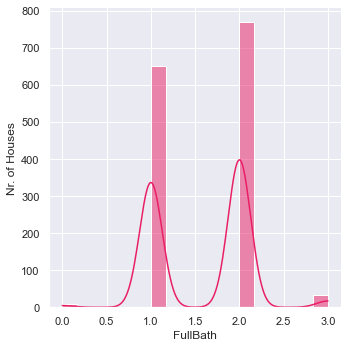

<Figure size 720x432 with 0 Axes>

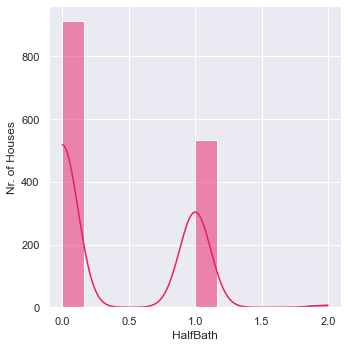

<Figure size 720x432 with 0 Axes>

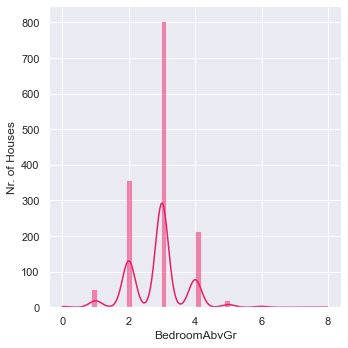

<Figure size 720x432 with 0 Axes>

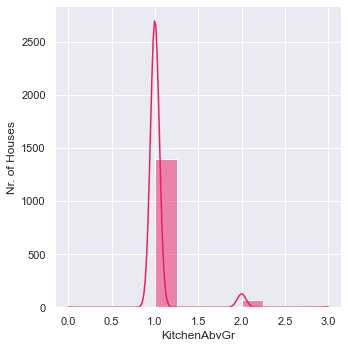

<Figure size 720x432 with 0 Axes>

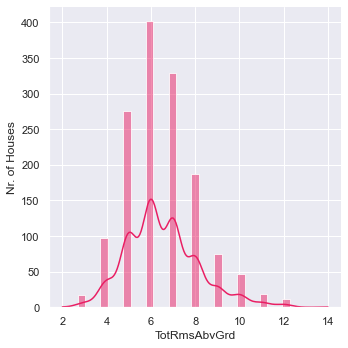

<Figure size 720x432 with 0 Axes>

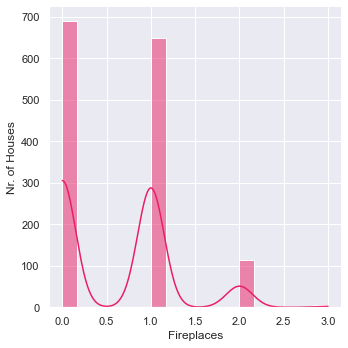

<Figure size 720x432 with 0 Axes>

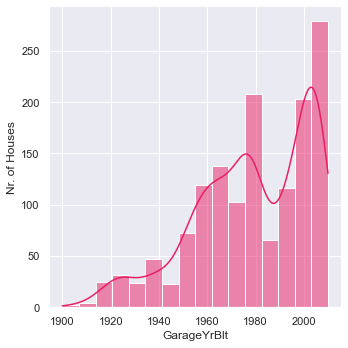

<Figure size 720x432 with 0 Axes>

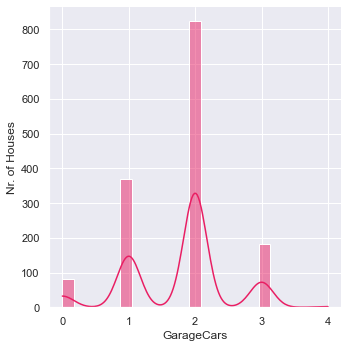

<Figure size 720x432 with 0 Axes>

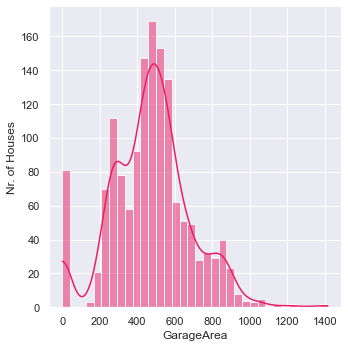

<Figure size 720x432 with 0 Axes>

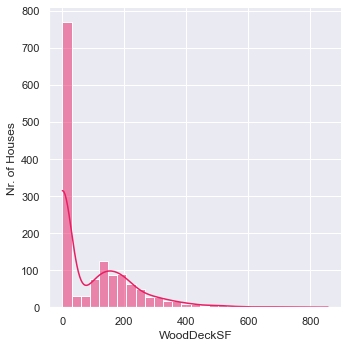

<Figure size 720x432 with 0 Axes>

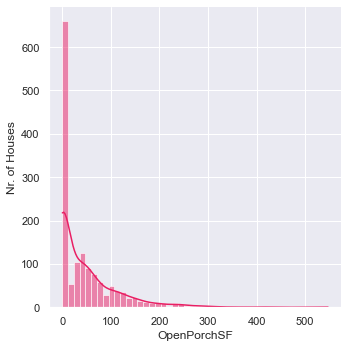

<Figure size 720x432 with 0 Axes>

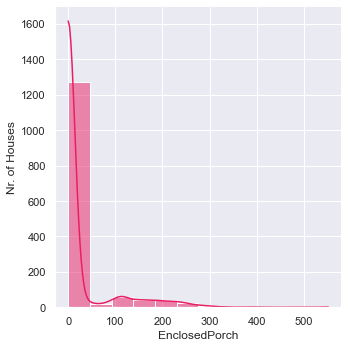

<Figure size 720x432 with 0 Axes>

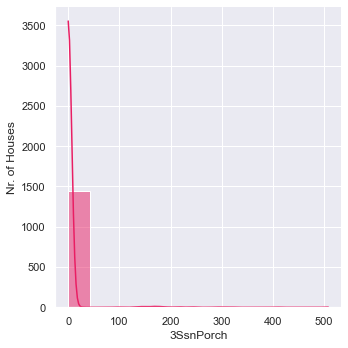

<Figure size 720x432 with 0 Axes>

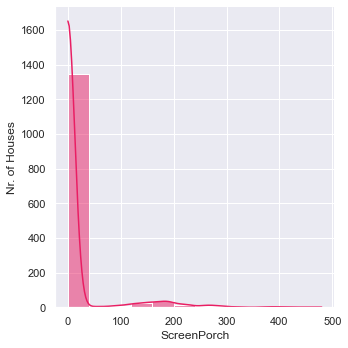

<Figure size 720x432 with 0 Axes>

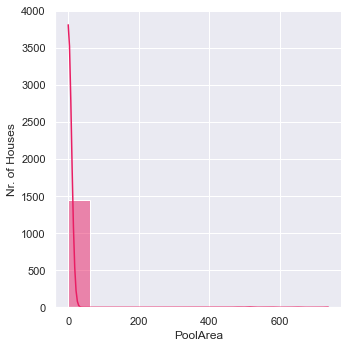

<Figure size 720x432 with 0 Axes>

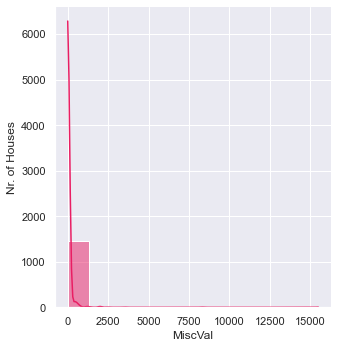

<Figure size 720x432 with 0 Axes>

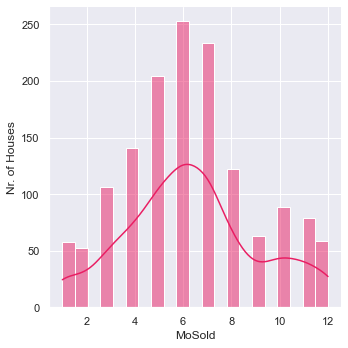

<Figure size 720x432 with 0 Axes>

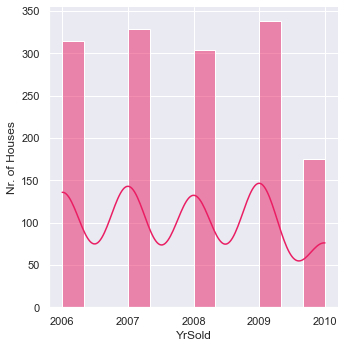

<Figure size 720x432 with 0 Axes>

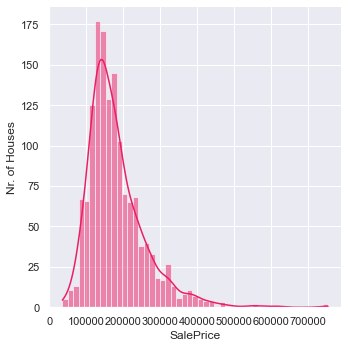

<Figure size 720x432 with 0 Axes>

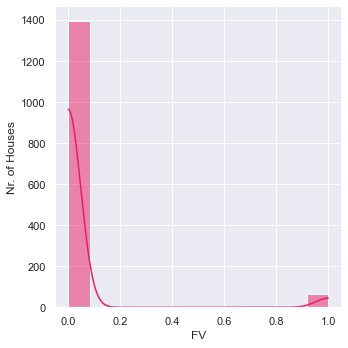

<Figure size 720x432 with 0 Axes>

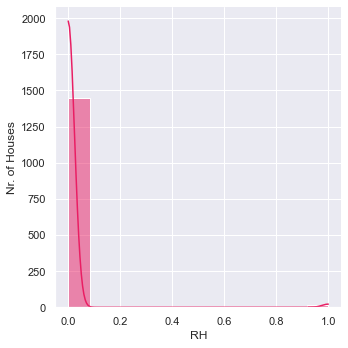

<Figure size 720x432 with 0 Axes>

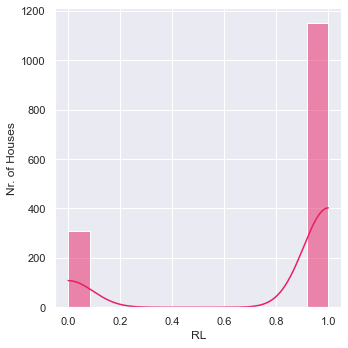

<Figure size 720x432 with 0 Axes>

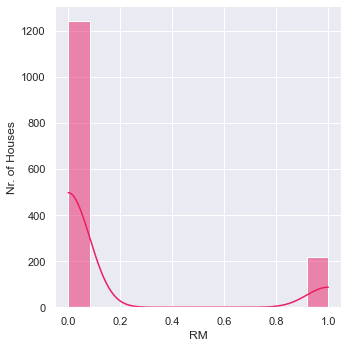

<Figure size 720x432 with 0 Axes>

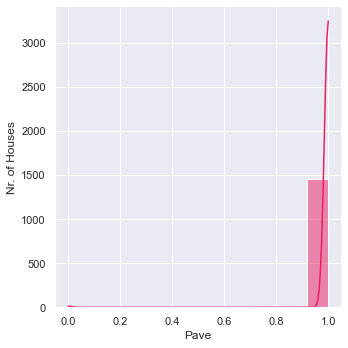

<Figure size 720x432 with 0 Axes>

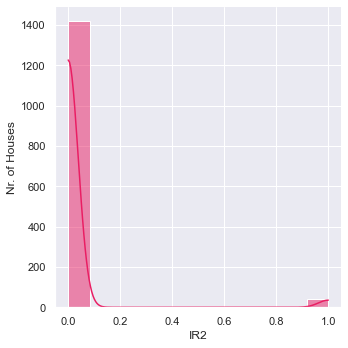

<Figure size 720x432 with 0 Axes>

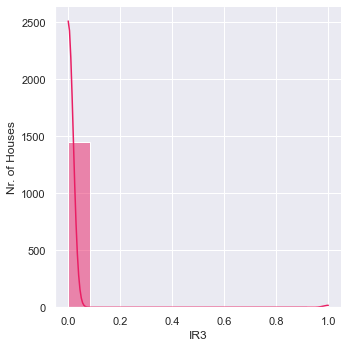

<Figure size 720x432 with 0 Axes>

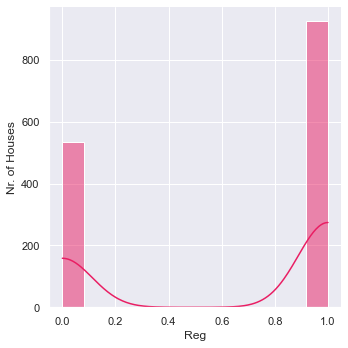

<Figure size 720x432 with 0 Axes>

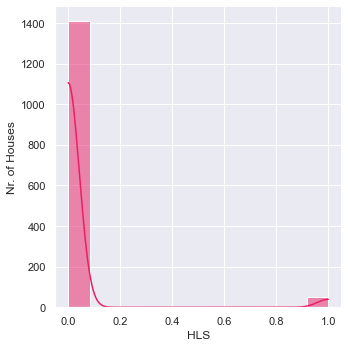

<Figure size 720x432 with 0 Axes>

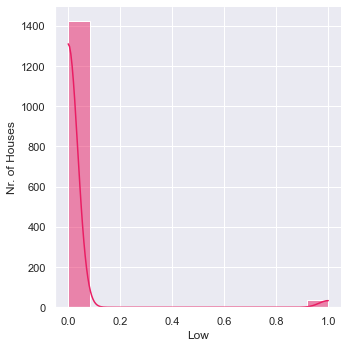

<Figure size 720x432 with 0 Axes>

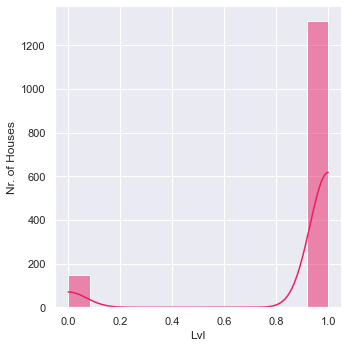

<Figure size 720x432 with 0 Axes>

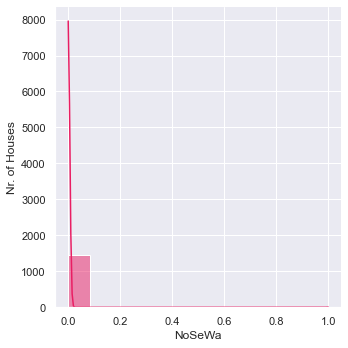

<Figure size 720x432 with 0 Axes>

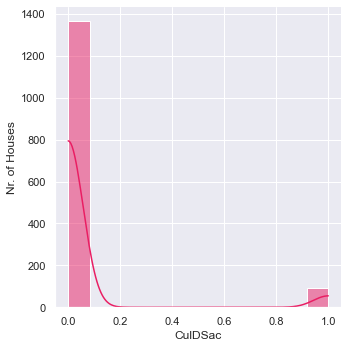

<Figure size 720x432 with 0 Axes>

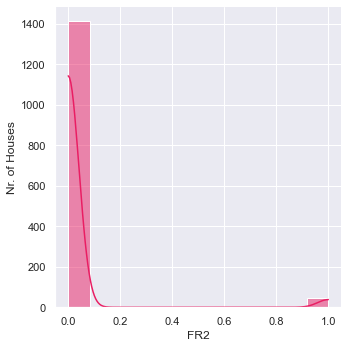

<Figure size 720x432 with 0 Axes>

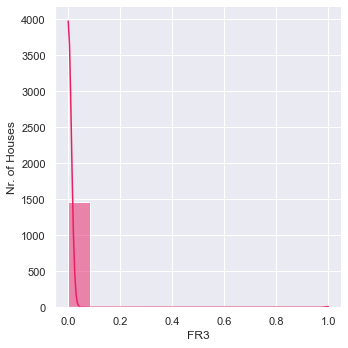

<Figure size 720x432 with 0 Axes>

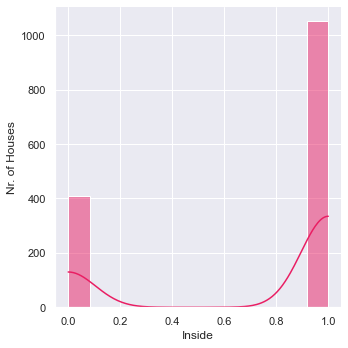

<Figure size 720x432 with 0 Axes>

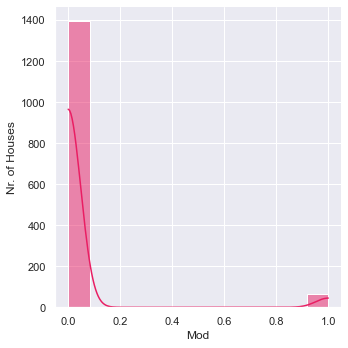

<Figure size 720x432 with 0 Axes>

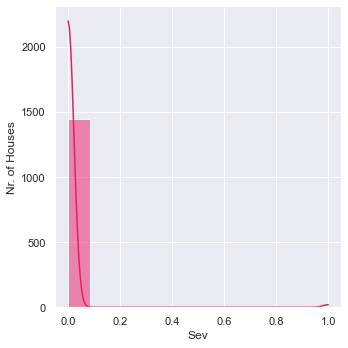

<Figure size 720x432 with 0 Axes>

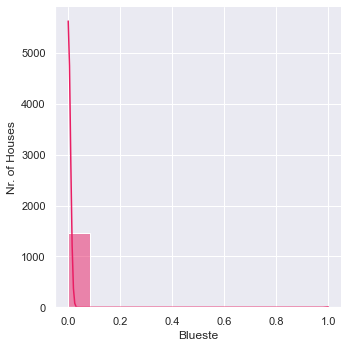

<Figure size 720x432 with 0 Axes>

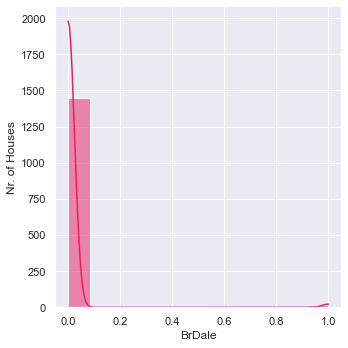

<Figure size 720x432 with 0 Axes>

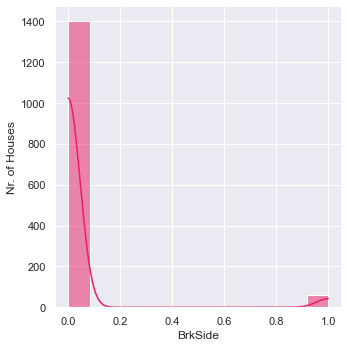

<Figure size 720x432 with 0 Axes>

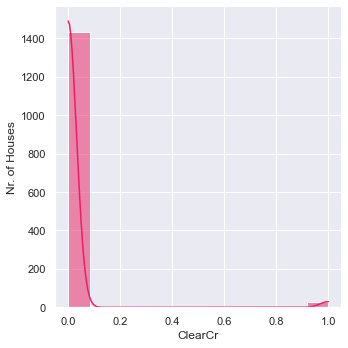

<Figure size 720x432 with 0 Axes>

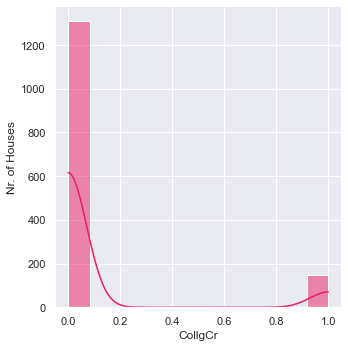

<Figure size 720x432 with 0 Axes>

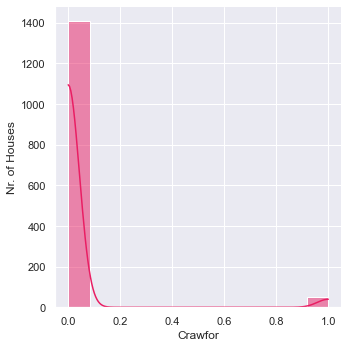

<Figure size 720x432 with 0 Axes>

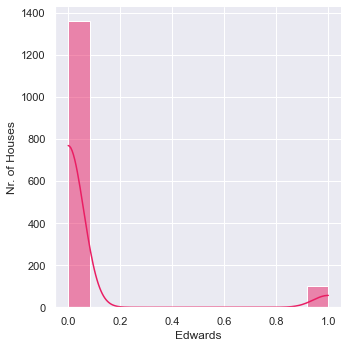

<Figure size 720x432 with 0 Axes>

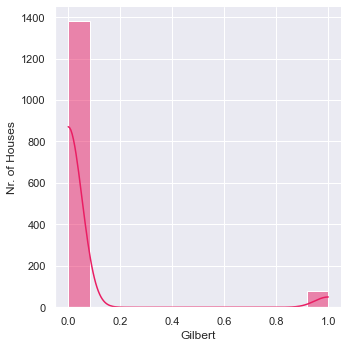

<Figure size 720x432 with 0 Axes>

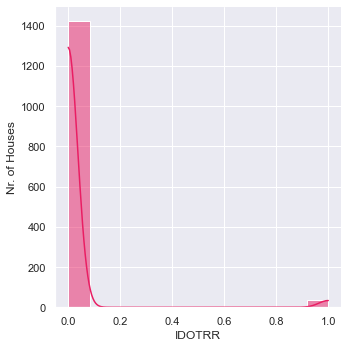

<Figure size 720x432 with 0 Axes>

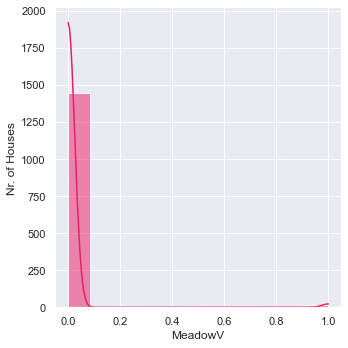

<Figure size 720x432 with 0 Axes>

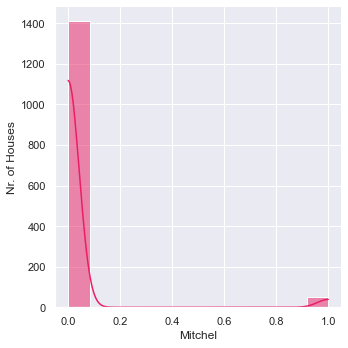

<Figure size 720x432 with 0 Axes>

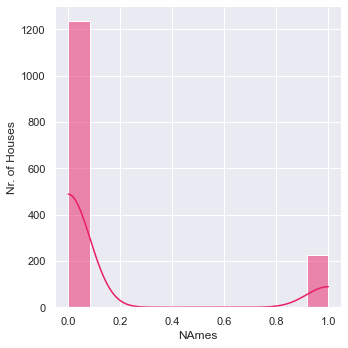

<Figure size 720x432 with 0 Axes>

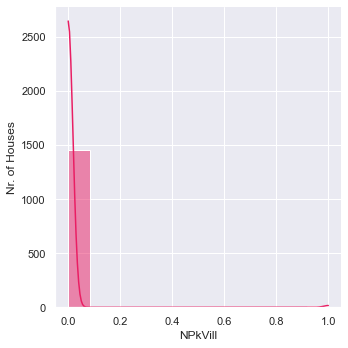

<Figure size 720x432 with 0 Axes>

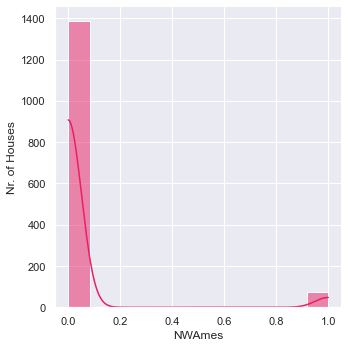

<Figure size 720x432 with 0 Axes>

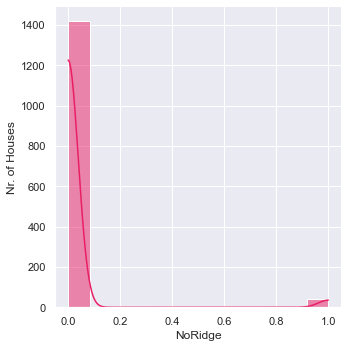

<Figure size 720x432 with 0 Axes>

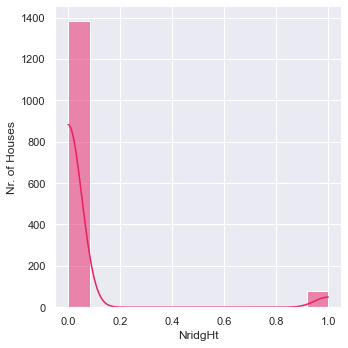

<Figure size 720x432 with 0 Axes>

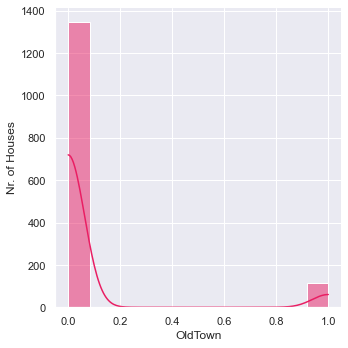

<Figure size 720x432 with 0 Axes>

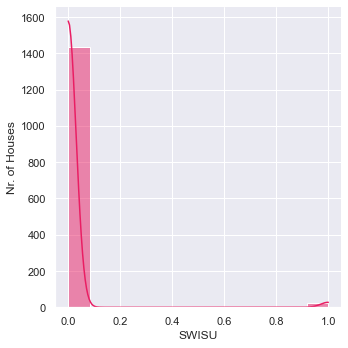

<Figure size 720x432 with 0 Axes>

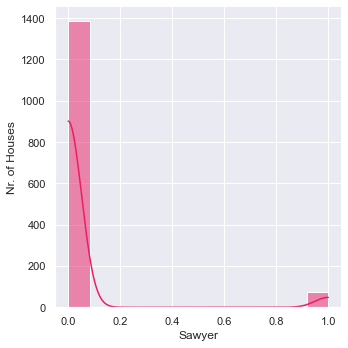

<Figure size 720x432 with 0 Axes>

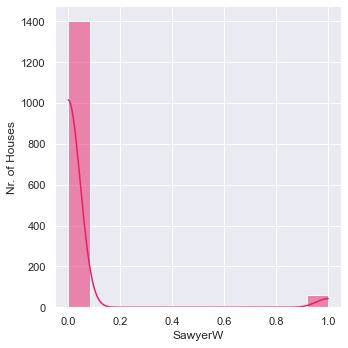

<Figure size 720x432 with 0 Axes>

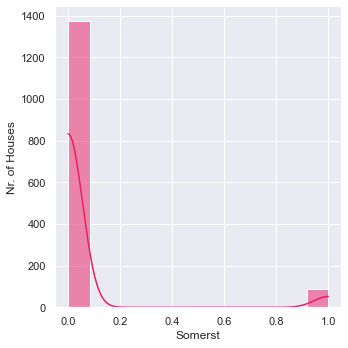

<Figure size 720x432 with 0 Axes>

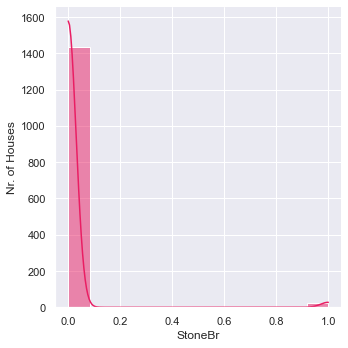

<Figure size 720x432 with 0 Axes>

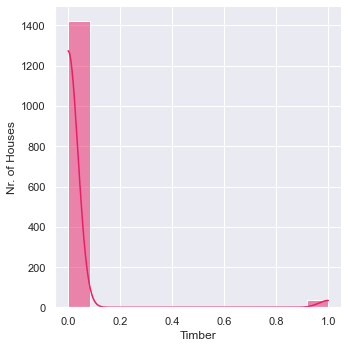

<Figure size 720x432 with 0 Axes>

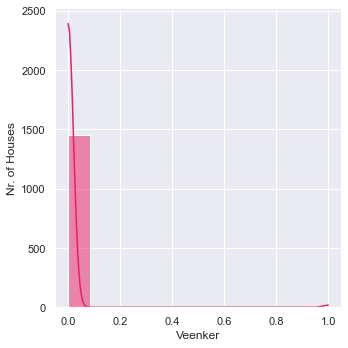

<Figure size 720x432 with 0 Axes>

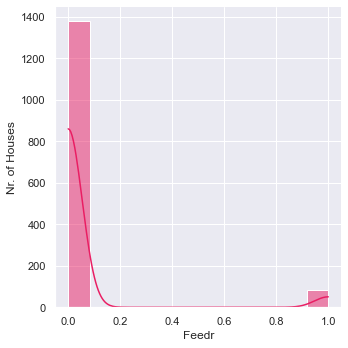

<Figure size 720x432 with 0 Axes>

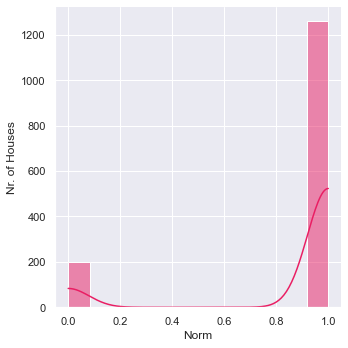

<Figure size 720x432 with 0 Axes>

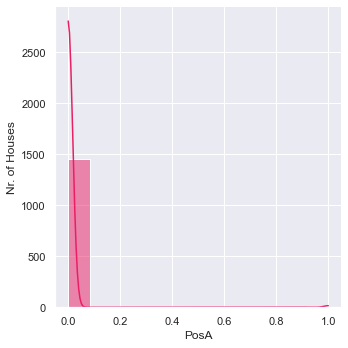

<Figure size 720x432 with 0 Axes>

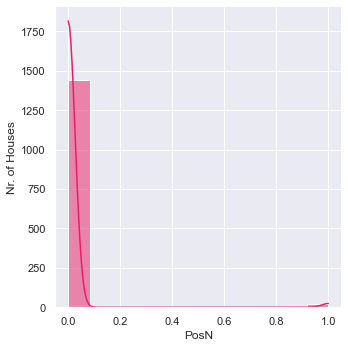

<Figure size 720x432 with 0 Axes>

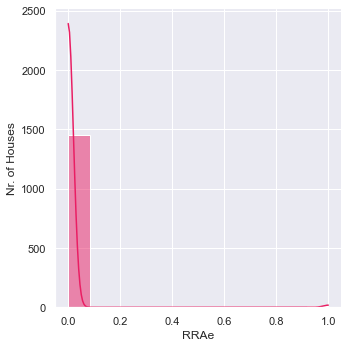

<Figure size 720x432 with 0 Axes>

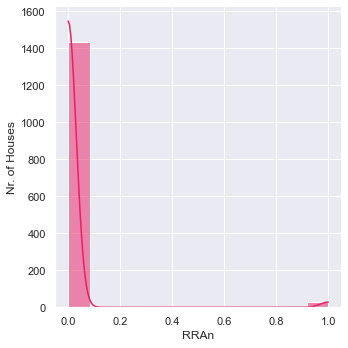

<Figure size 720x432 with 0 Axes>

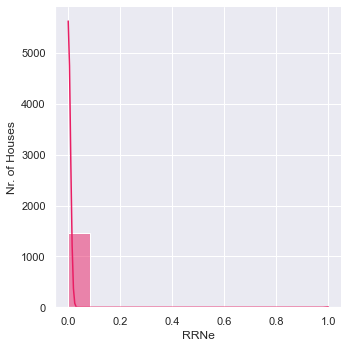

<Figure size 720x432 with 0 Axes>

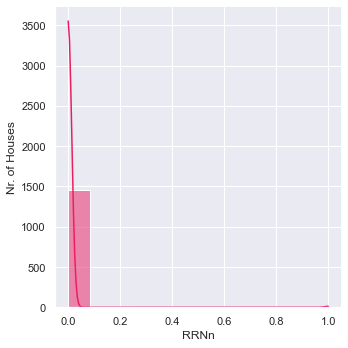

<Figure size 720x432 with 0 Axes>

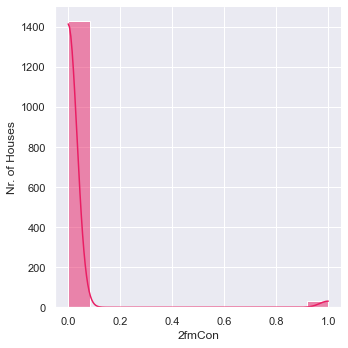

<Figure size 720x432 with 0 Axes>

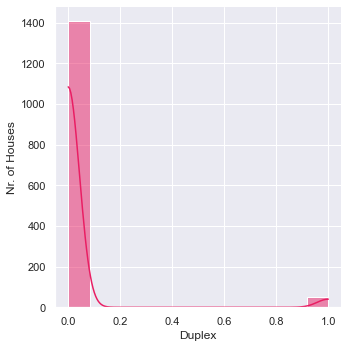

<Figure size 720x432 with 0 Axes>

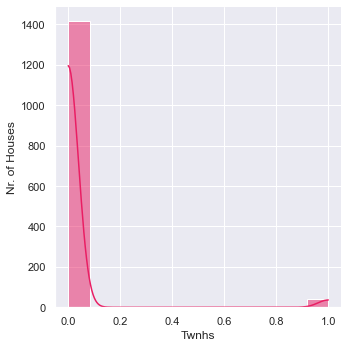

<Figure size 720x432 with 0 Axes>

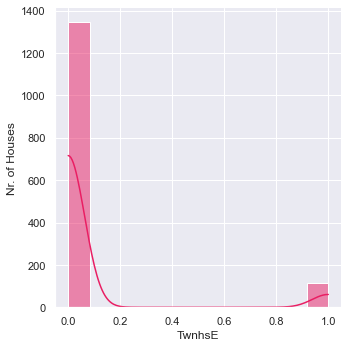

<Figure size 720x432 with 0 Axes>

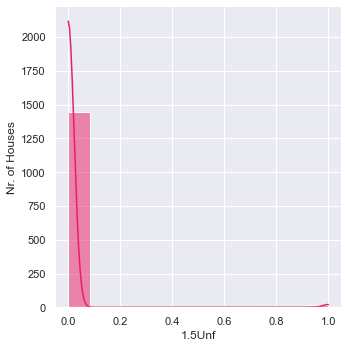

<Figure size 720x432 with 0 Axes>

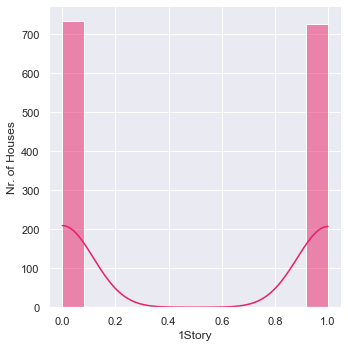

<Figure size 720x432 with 0 Axes>

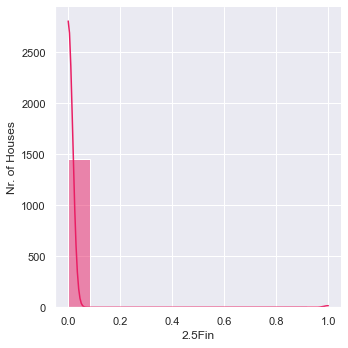

<Figure size 720x432 with 0 Axes>

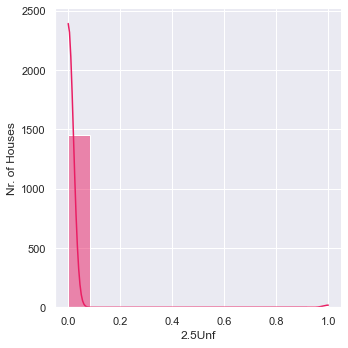

<Figure size 720x432 with 0 Axes>

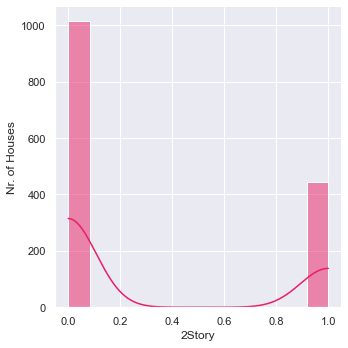

<Figure size 720x432 with 0 Axes>

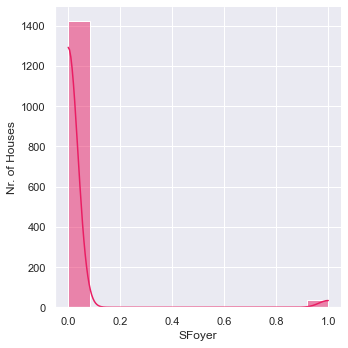

<Figure size 720x432 with 0 Axes>

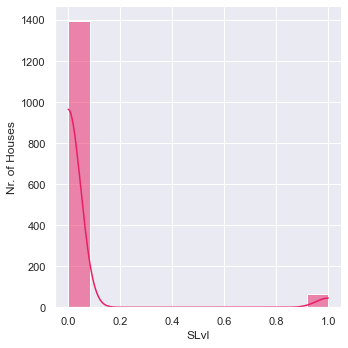

<Figure size 720x432 with 0 Axes>

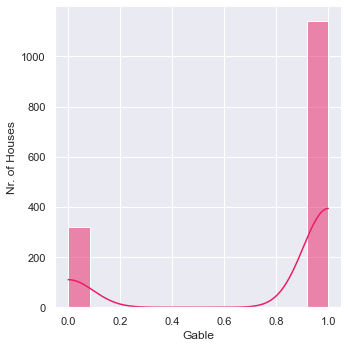

<Figure size 720x432 with 0 Axes>

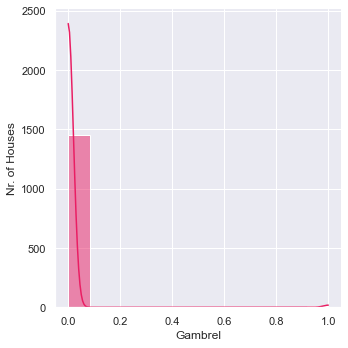

<Figure size 720x432 with 0 Axes>

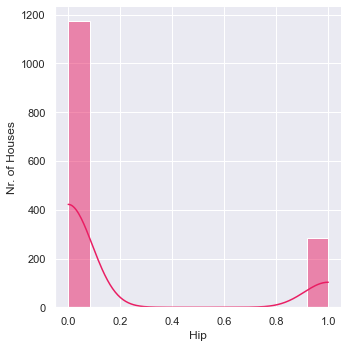

<Figure size 720x432 with 0 Axes>

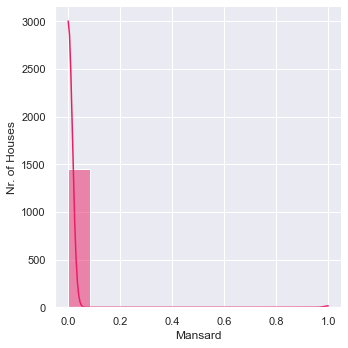

<Figure size 720x432 with 0 Axes>

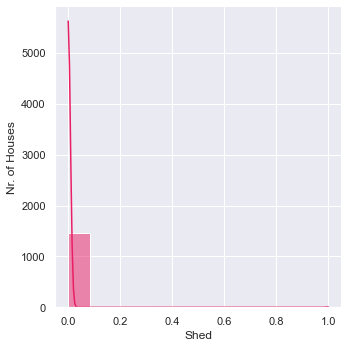

<Figure size 720x432 with 0 Axes>

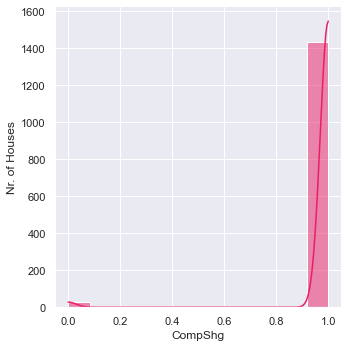

<Figure size 720x432 with 0 Axes>

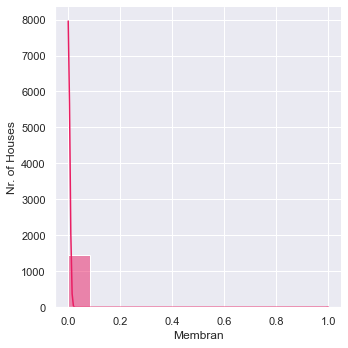

<Figure size 720x432 with 0 Axes>

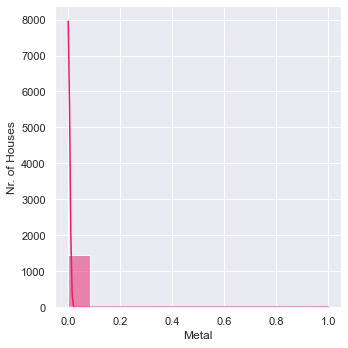

<Figure size 720x432 with 0 Axes>

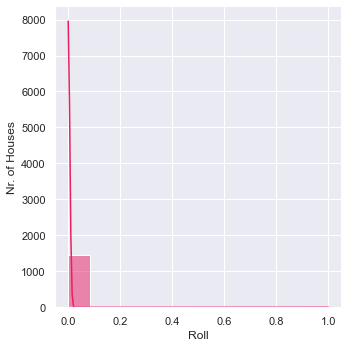

<Figure size 720x432 with 0 Axes>

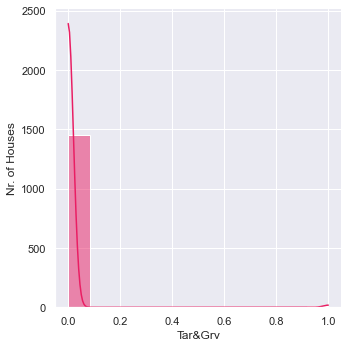

<Figure size 720x432 with 0 Axes>

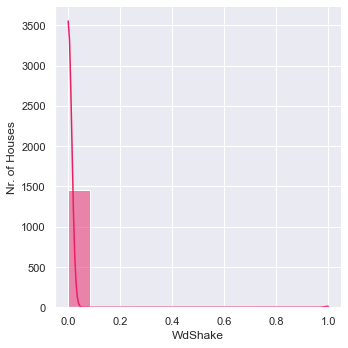

<Figure size 720x432 with 0 Axes>

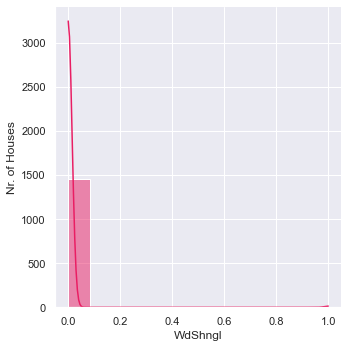

<Figure size 720x432 with 0 Axes>

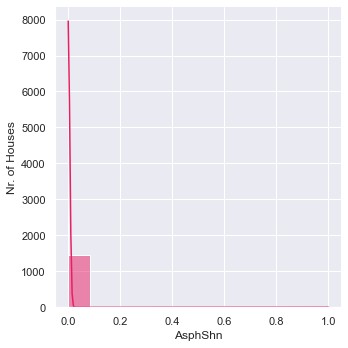

<Figure size 720x432 with 0 Axes>

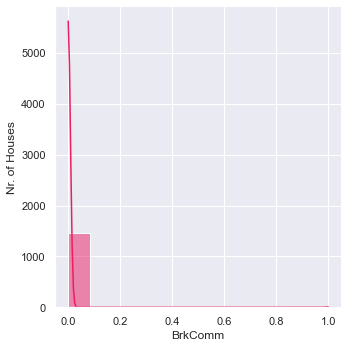

<Figure size 720x432 with 0 Axes>

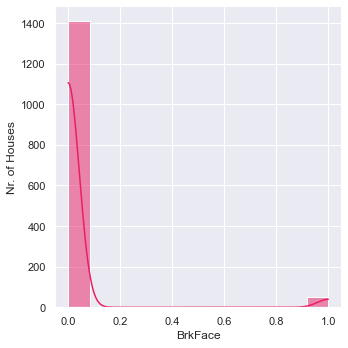

<Figure size 720x432 with 0 Axes>

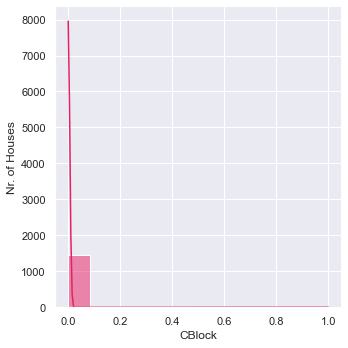

<Figure size 720x432 with 0 Axes>

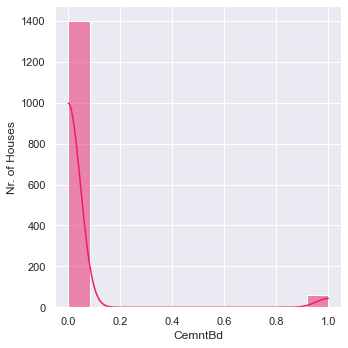

<Figure size 720x432 with 0 Axes>

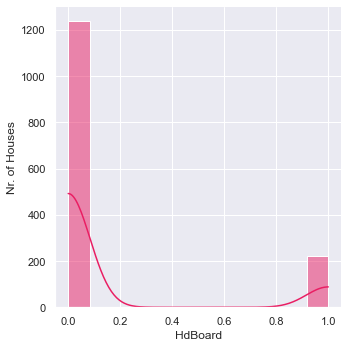

<Figure size 720x432 with 0 Axes>

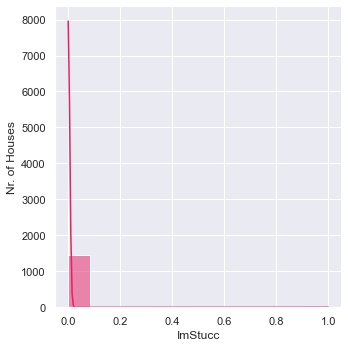

<Figure size 720x432 with 0 Axes>

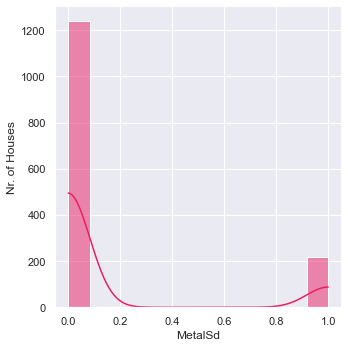

<Figure size 720x432 with 0 Axes>

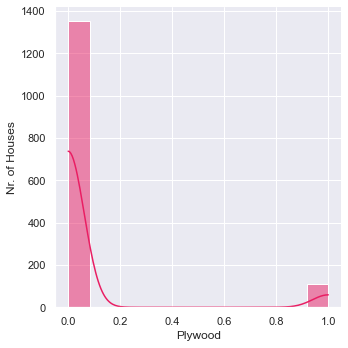

<Figure size 720x432 with 0 Axes>

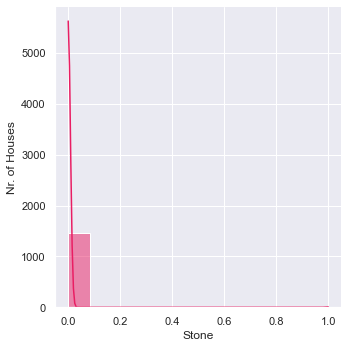

<Figure size 720x432 with 0 Axes>

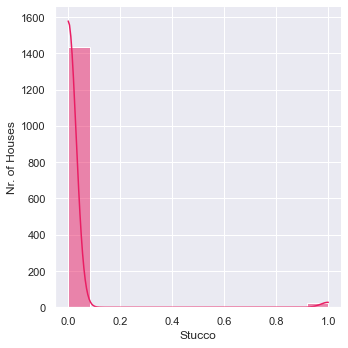

<Figure size 720x432 with 0 Axes>

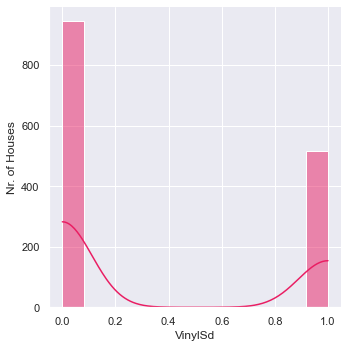

<Figure size 720x432 with 0 Axes>

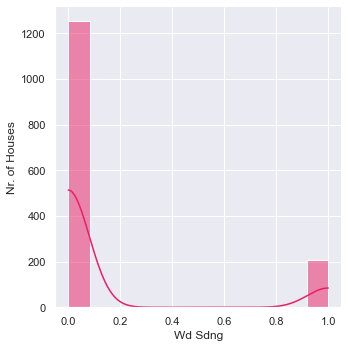

<Figure size 720x432 with 0 Axes>

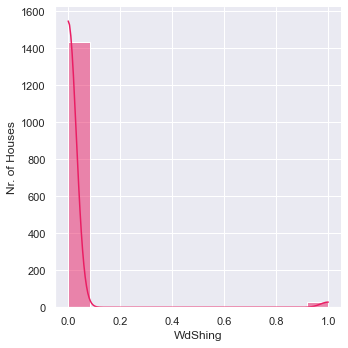

<Figure size 720x432 with 0 Axes>

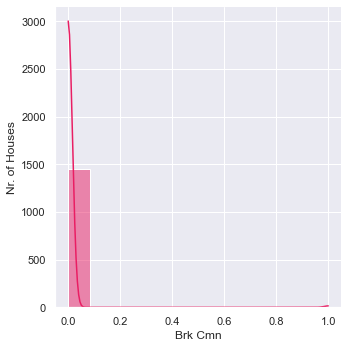

<Figure size 720x432 with 0 Axes>

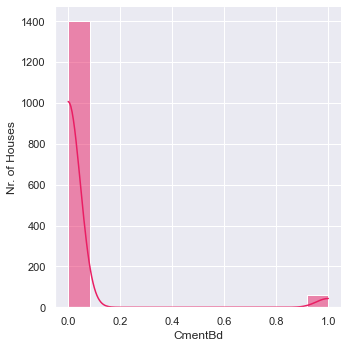

<Figure size 720x432 with 0 Axes>

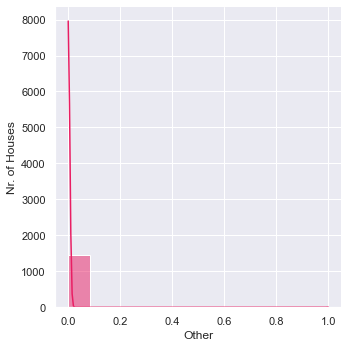

<Figure size 720x432 with 0 Axes>

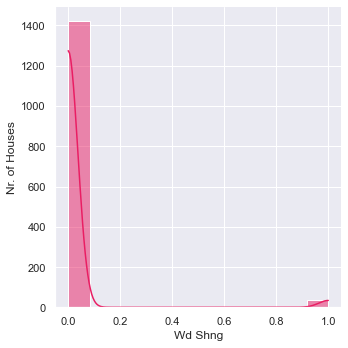

<Figure size 720x432 with 0 Axes>

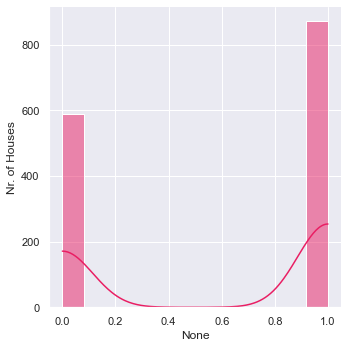

<Figure size 720x432 with 0 Axes>

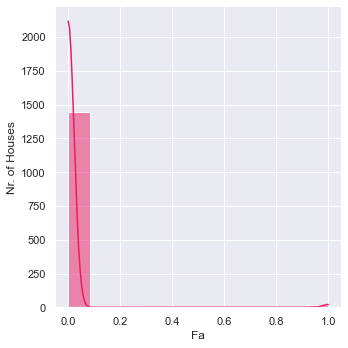

<Figure size 720x432 with 0 Axes>

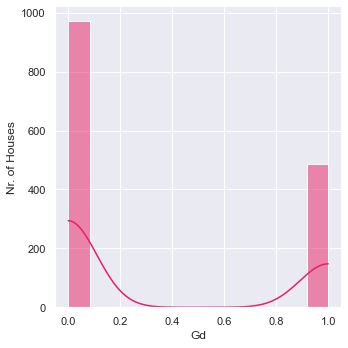

<Figure size 720x432 with 0 Axes>

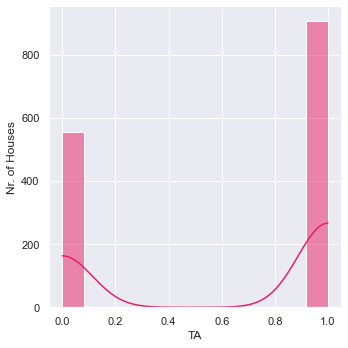

<Figure size 720x432 with 0 Axes>

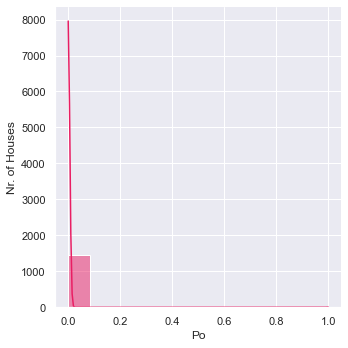

<Figure size 720x432 with 0 Axes>

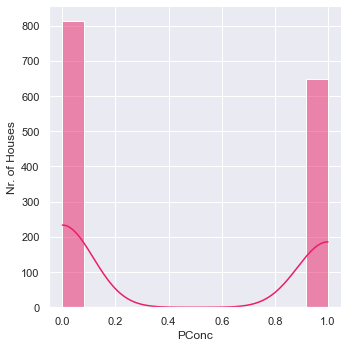

<Figure size 720x432 with 0 Axes>

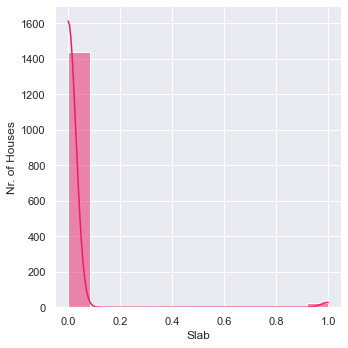

<Figure size 720x432 with 0 Axes>

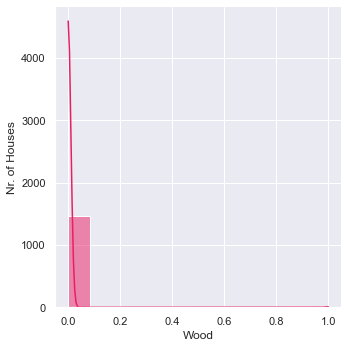

<Figure size 720x432 with 0 Axes>

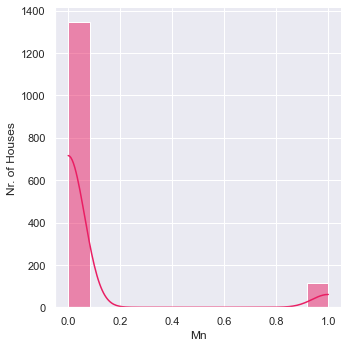

<Figure size 720x432 with 0 Axes>

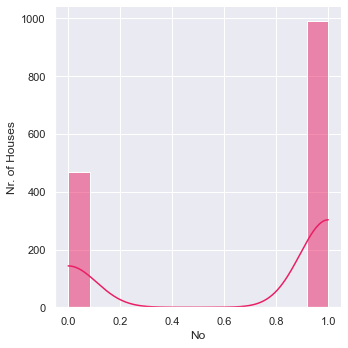

<Figure size 720x432 with 0 Axes>

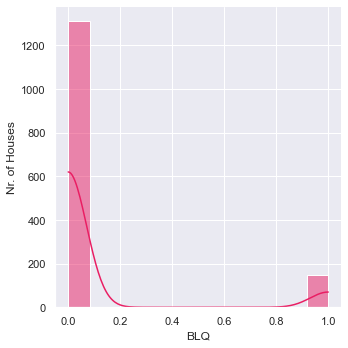

<Figure size 720x432 with 0 Axes>

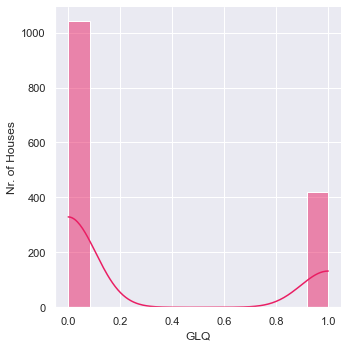

<Figure size 720x432 with 0 Axes>

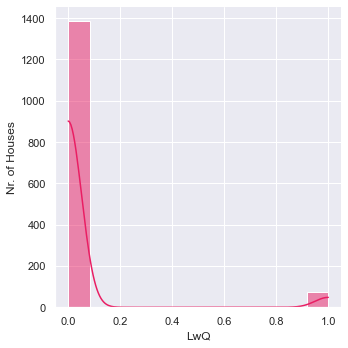

<Figure size 720x432 with 0 Axes>

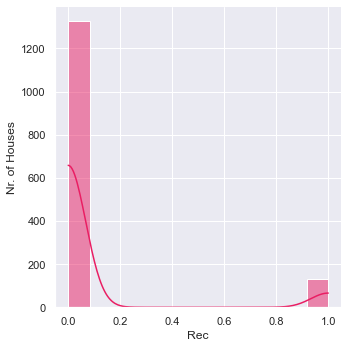

<Figure size 720x432 with 0 Axes>

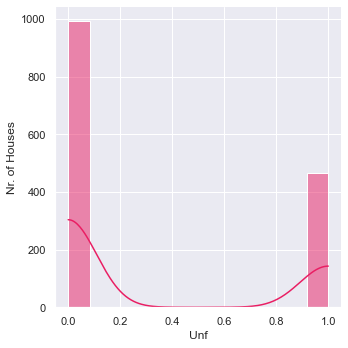

<Figure size 720x432 with 0 Axes>

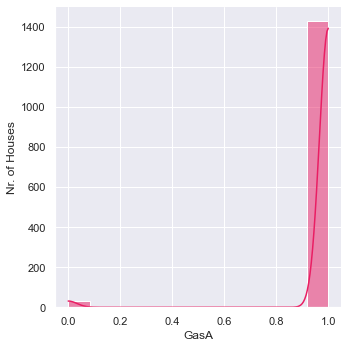

<Figure size 720x432 with 0 Axes>

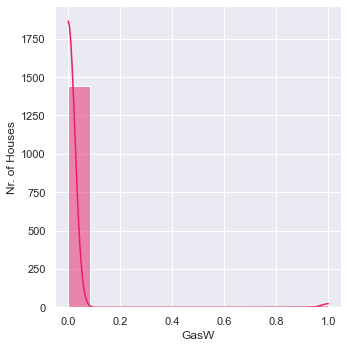

<Figure size 720x432 with 0 Axes>

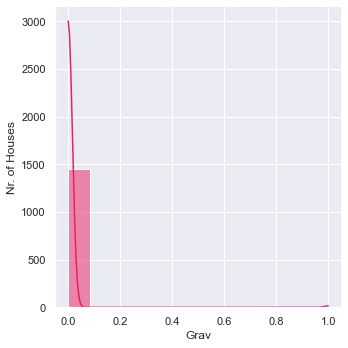

<Figure size 720x432 with 0 Axes>

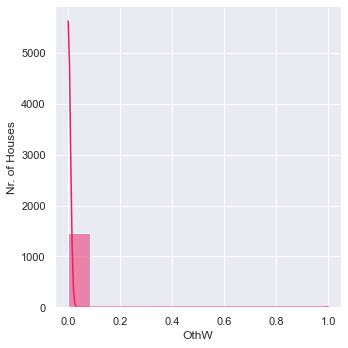

<Figure size 720x432 with 0 Axes>

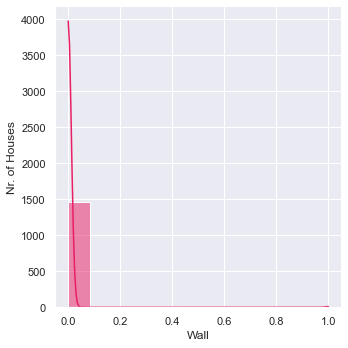

<Figure size 720x432 with 0 Axes>

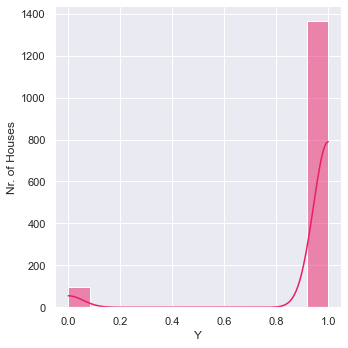

<Figure size 720x432 with 0 Axes>

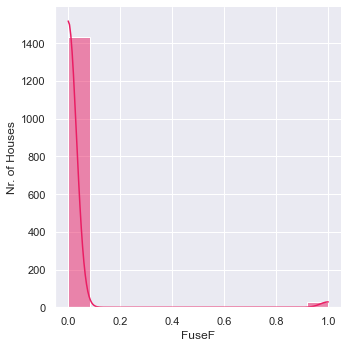

<Figure size 720x432 with 0 Axes>

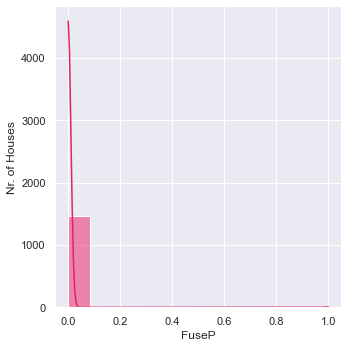

<Figure size 720x432 with 0 Axes>

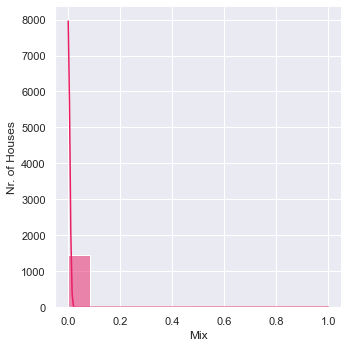

<Figure size 720x432 with 0 Axes>

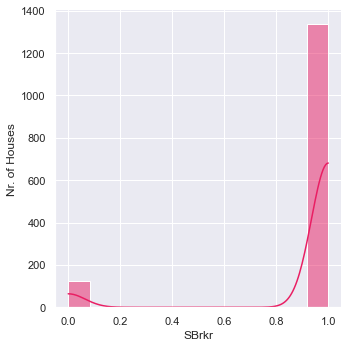

<Figure size 720x432 with 0 Axes>

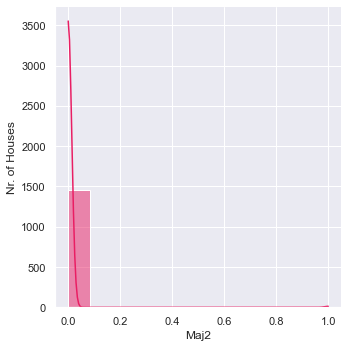

<Figure size 720x432 with 0 Axes>

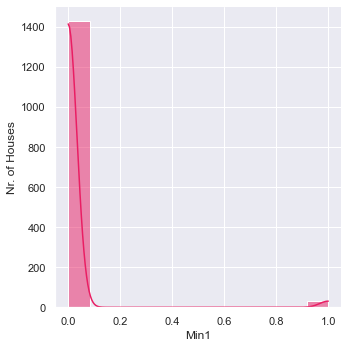

<Figure size 720x432 with 0 Axes>

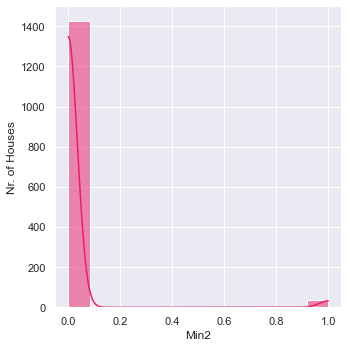

<Figure size 720x432 with 0 Axes>

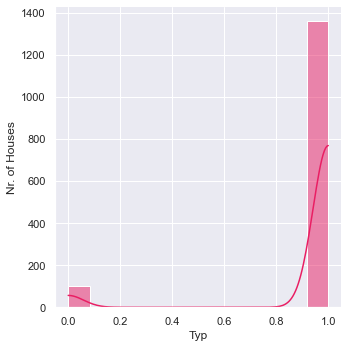

<Figure size 720x432 with 0 Axes>

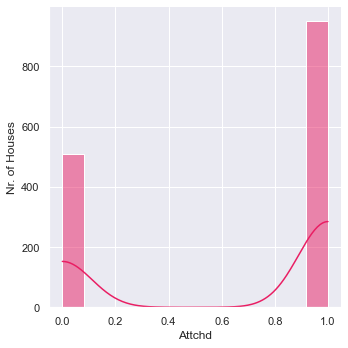

<Figure size 720x432 with 0 Axes>

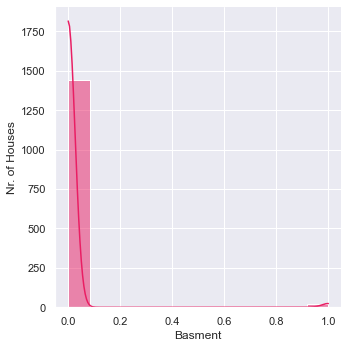

<Figure size 720x432 with 0 Axes>

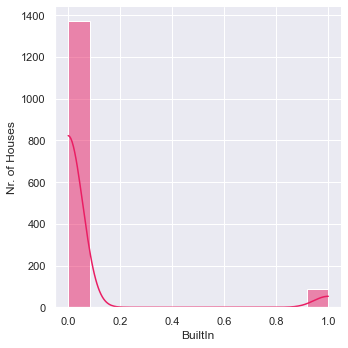

<Figure size 720x432 with 0 Axes>

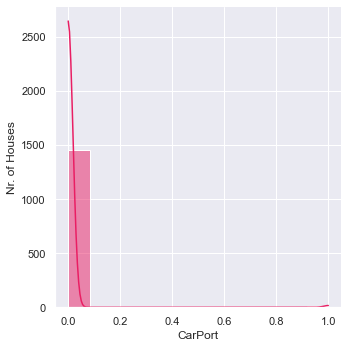

<Figure size 720x432 with 0 Axes>

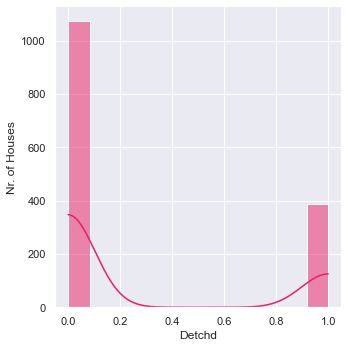

<Figure size 720x432 with 0 Axes>

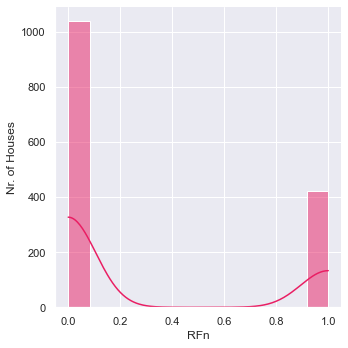

<Figure size 720x432 with 0 Axes>

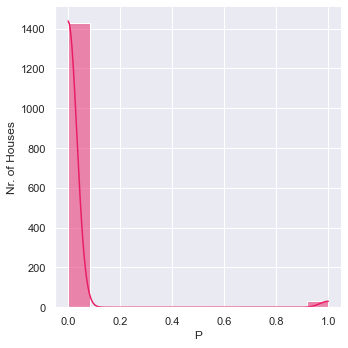

<Figure size 720x432 with 0 Axes>

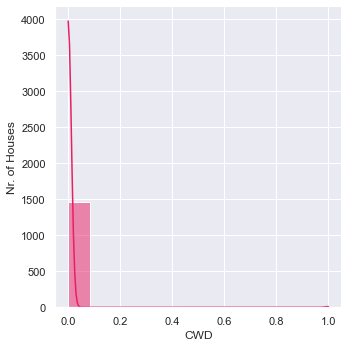

<Figure size 720x432 with 0 Axes>

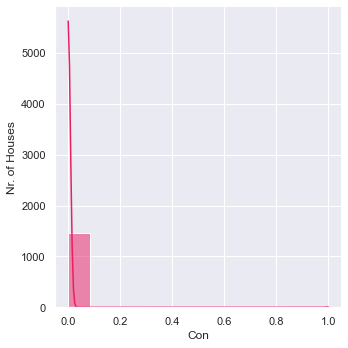

<Figure size 720x432 with 0 Axes>

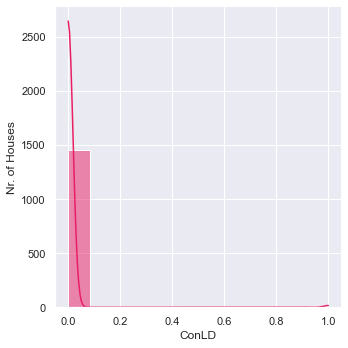

<Figure size 720x432 with 0 Axes>

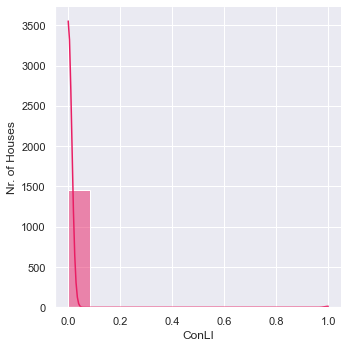

<Figure size 720x432 with 0 Axes>

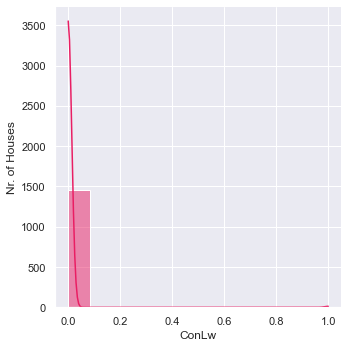

<Figure size 720x432 with 0 Axes>

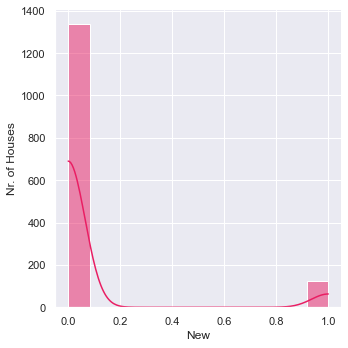

<Figure size 720x432 with 0 Axes>

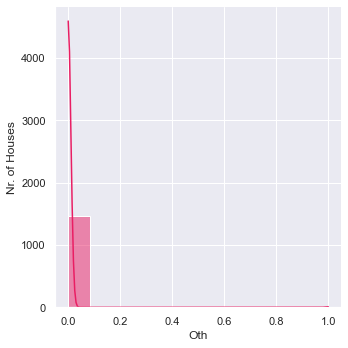

<Figure size 720x432 with 0 Axes>

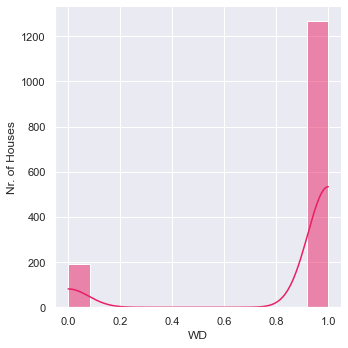

<Figure size 720x432 with 0 Axes>

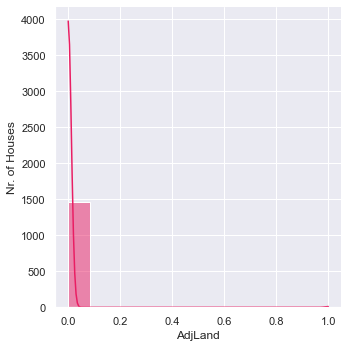

<Figure size 720x432 with 0 Axes>

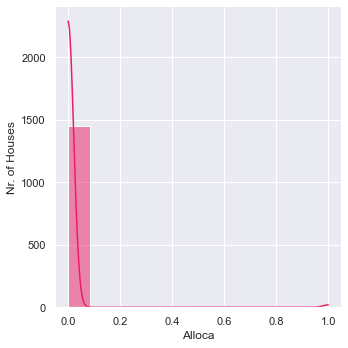

<Figure size 720x432 with 0 Axes>

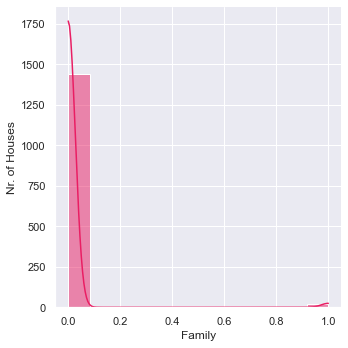

<Figure size 720x432 with 0 Axes>

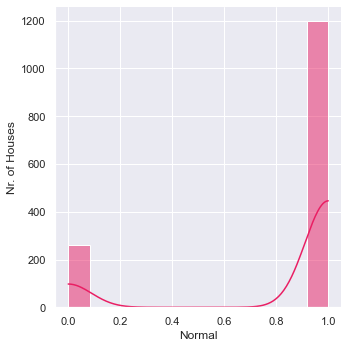

<Figure size 720x432 with 0 Axes>

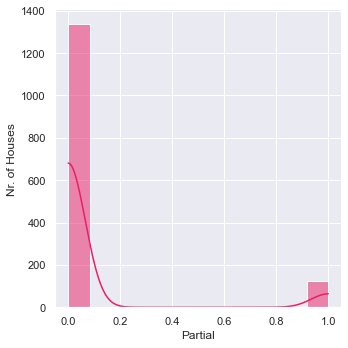

In [57]:
for i in cols:
    plt.figure(figsize=(10, 6))
    #plt.hist(df_Train[i], bins=50, ec='white', color='#E91E63')
    sns.displot(df_Train[i],color = '#E91E63',kde=True)
    plt.xlabel(i)
    plt.ylabel('Nr. of Houses')
    plt.show()

# Correlation

In [50]:
df_Train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
MSSubClass,1.000000,-3.570559e-01,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.001244,0.014005,-0.045156,-0.014555,0.026359,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.357056,1.000000e+00,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.043340,...,0.012674,-0.051787,0.126580,-0.023461,-0.089928,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.139781,3.067946e-01,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.032628,2.341962e-01,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.059316,-5.282010e-02,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,0.001299,-0.019779,-0.156175,-0.050663,0.163684,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,0.027850,1.175980e-01,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.002975,-0.023431,0.346954,0.012122,-0.238463,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,0.040581,8.274589e-02,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.011175,-0.039952,0.325647,-0.011431,-0.182733,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
MasVnrArea,0.023573,1.786994e-01,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.015601,-0.022686,0.165692,-0.025899,-0.128187,-0.011783,-0.013748,-0.009535,-0.081539,0.162205
BsmtFinSF1,-0.069836,2.158284e-01,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.022726,-0.017825,0.044883,0.010652,-0.024778,-0.014874,0.021369,0.000765,-0.019560,0.044912
BsmtFinSF2,-0.065649,4.333957e-02,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,-0.016921,0.035715,-0.087162,-0.013098,0.036178,-0.015130,-0.026277,-0.007929,0.041207,-0.085761
